In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcY29udHJcT25lRHJpdmUgLSBJTlRFQ1xUUkkgOVxFQ09OT01cZml4ZWRfaW5jb21lX2dhcmNoXG5vdGVib29rcw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

C:\Users\contr\AppData\Local\Temp\ipykernel_23628\3554809694.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"C:\\Users\\contr\\anaconda3\\Lib\\importlib\\_bootstrap.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\importlib\\_bootstrap_external.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\zipimport.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\codecs.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\encodings\\aliases.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\encodings\\__init__.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\encodings\\utf_8.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\encodings\\cp1252.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\abc.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\io.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\stat.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\_collections_abc.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\genericpath.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\ntpath.py": 1692878958.0, "C:\\Users\\contr\\anaconda3\\Lib\\os.py": 16928789

In [2]:
#| label: importing-libraries
# Manejo de datos y análisis
import numpy as np
import pandas as pd
import scipy.stats as stats

# Modelos estadísticos y econométricos
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from arch import arch_model

# Visualización
import matplotlib.pyplot as plt

# Presentación en IPython
from IPython.display import Markdown, HTML

In [3]:
#| label: importing-data
df = pd.read_csv(r'..\data\csv\irp.csv', parse_dates=[
                 'date'], index_col='date')
# df = pd.read_csv(r'.\data\csv\irp.csv', parse_dates=[
#                  'date'], index_col='date')
returns = df['price_return']
split_date = '2020-12-31'
R_test = df[df.index >= split_date]['price_return'].rolling(
    window=5).std().dropna()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


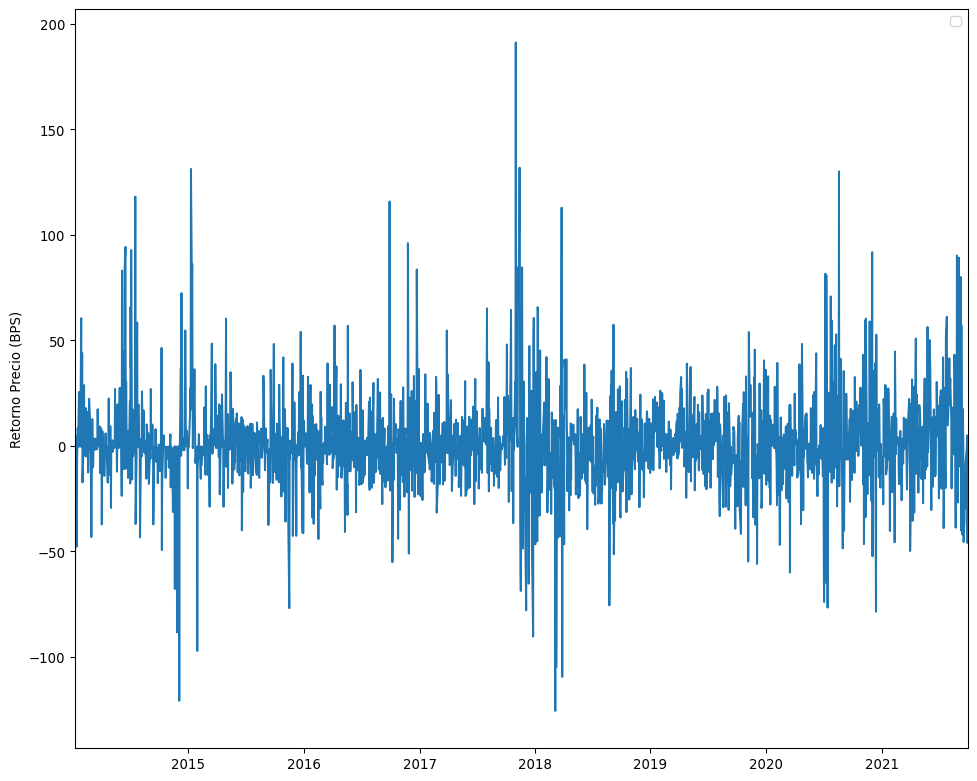

In [4]:
#| label: fig-price-return-series
#| fig-cap: Serie de retornos diarios IRP-GOBIX.
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(df.index, df['price_return'])
ax.set_ylabel('Retorno Precio (BPS)')
ax.set_xlim([df.index.min(), df.index.max()])
ax.legend()
plt.show()

In [5]:
#| label: return-descriptive-stats
#| fig-cap: Tabla de las estadísticas descriptiva de la serie de retornos
desc_stats = returns.describe()

skewness = returns.skew()
kurtosis = returns.kurtosis()
jb_test = sm.stats.jarque_bera(returns)

descriptive_table = pd.DataFrame({
    'Observations': [int(desc_stats['count'])],
    'Mean': [desc_stats['mean']],
    'Median': [desc_stats['50%']],
    'Std. Dev': [desc_stats['std']],
    'Skewness': [skewness],
    'Kurtosis': [kurtosis],
    'Jarque-Bera': [jb_test[0]],
    'Prob.': [jb_test[1]]
})
Markdown(descriptive_table.to_markdown(index=False))

|   Observations |    Mean |    Median |   Std. Dev |   Skewness |   Kurtosis |   Jarque-Bera |   Prob. |
|---------------:|--------:|----------:|-----------:|-----------:|-----------:|--------------:|--------:|
|           1941 | 1.35325 | -0.318044 |    23.5029 |    0.70527 |      7.588 |       4789.53 |       0 |

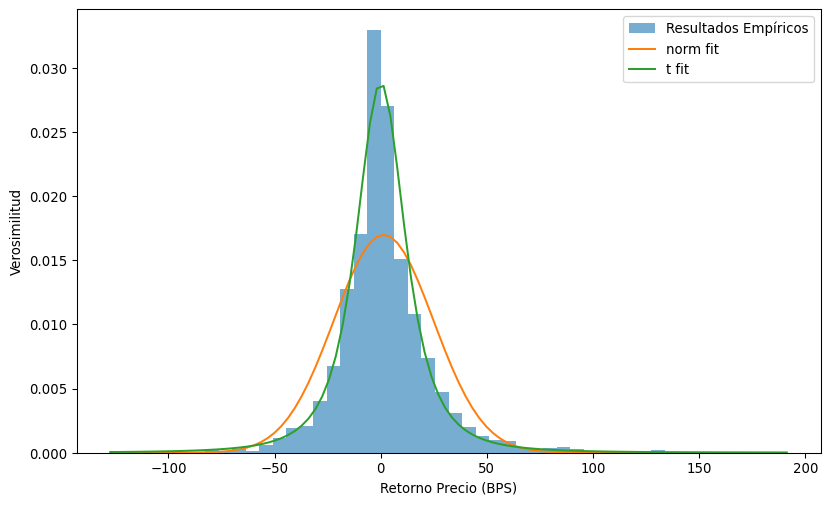

In [6]:
#| label: fig-distribution-fitting
#| fig-cap: Ajuste de distribuciones a los retornos de precio.
distributions = [stats.norm, stats.t]

plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, density=True, alpha=0.6, label='Resultados Empíricos')

for dist in distributions:
    params = dist.fit(returns)
    x = np.linspace(returns.min(), returns.max(), 100)
    plt.plot(x, dist.pdf(x, *params), label=f'{dist.name} fit')

plt.xlabel('Retorno Precio (BPS)')
plt.ylabel('Verosimilitud')
plt.legend()
plt.show()

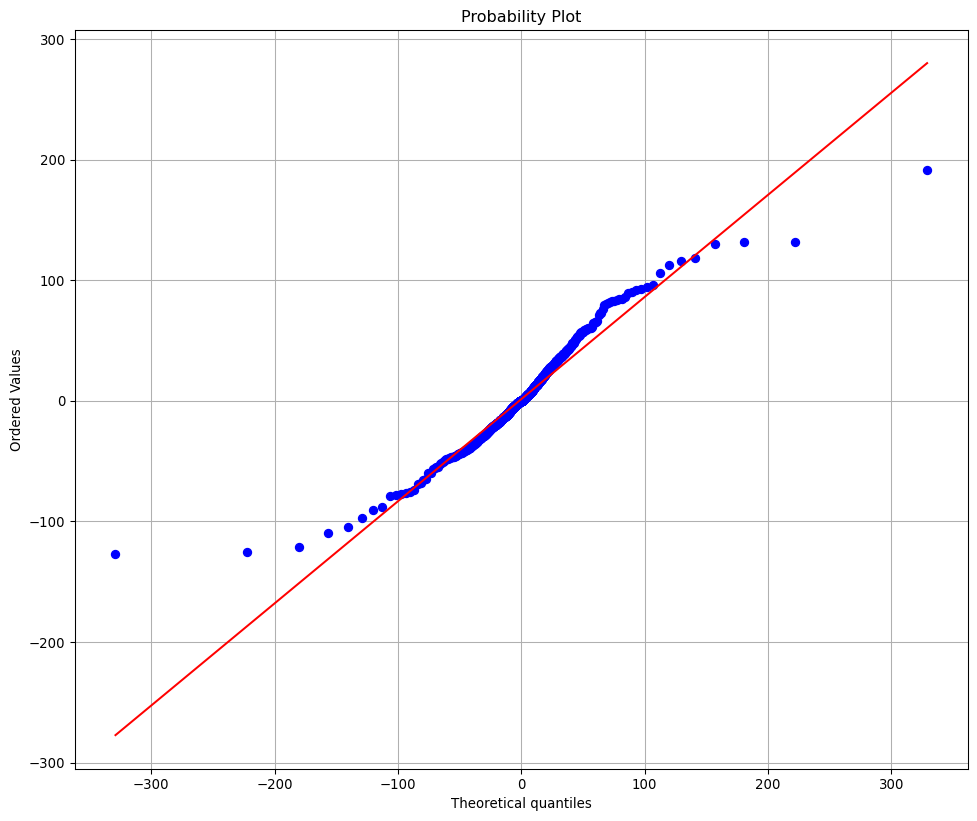

In [7]:
#| label: fig-tqq-plot
#| fig-cap: Q-Q Plot de retornos de precio contra la distribución t.
t_params = stats.t.fit(returns)

fig, ax = plt.subplots(figsize=(12, 10))
stats.probplot(returns, dist="t", sparams=t_params, plot=plt)
plt.grid(True)
plt.show()

In [8]:
#| label: kolmorov-smirnov
ks_stat, p_value = stats.kstest(returns, 't', args=t_params)
print(f"Kolmogorov-Smirnov statistic: {ks_stat}")
print(f"P-value: {p_value}")

Kolmogorov-Smirnov statistic: 0.028557323574938343
P-value: 0.0827419967953622


In [9]:
#| label: adf
result = adfuller(returns)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -13.174114850736395
p-value: 1.2332976276203498e-24


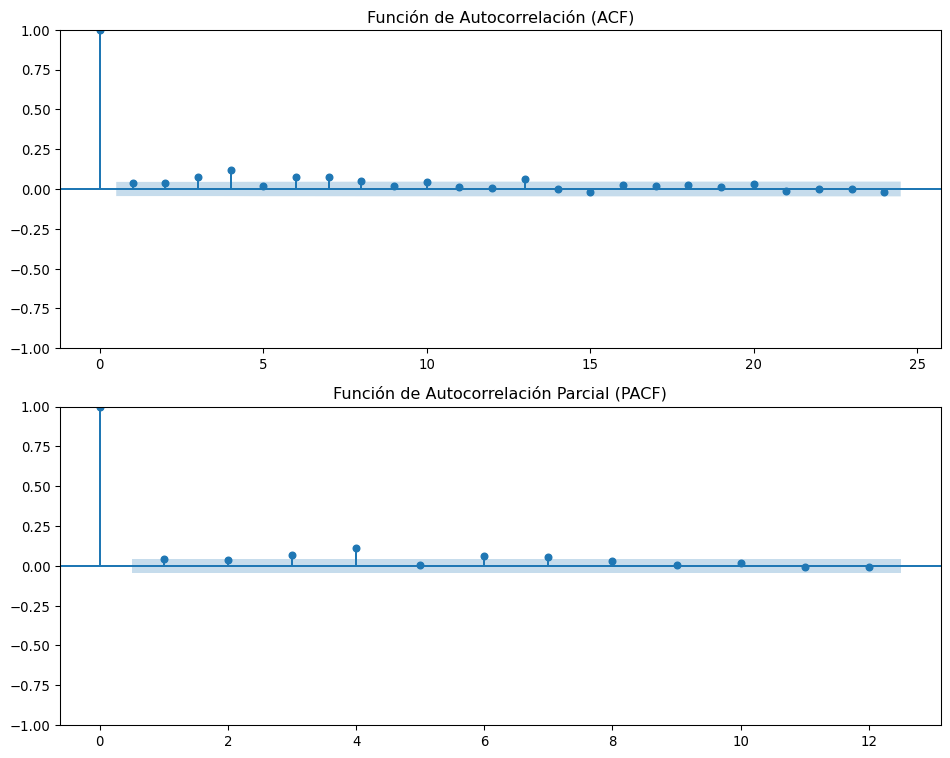

In [10]:
#| label: fig-acf-pacf
#| fig-cap: Función de autocorrelación (ACF) y función de autocorrelación parcial (PACF) de los retornos.
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(returns, lags=24, ax=axes[0])
axes[0].set_title('Función de Autocorrelación (ACF)')

plot_pacf(returns, lags=12, ax=axes[1])
axes[1].set_title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()

In [11]:
#| label: arima-model
#| fig-cap: Modelo ARIMA de maxima verosimilitud para la serie de retornos.
model_auto = auto_arima(returns)
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1941
Model:               SARIMAX(3, 0, 4)   Log Likelihood               -8853.517
Date:                Sat, 19 Oct 2024   AIC                          17725.034
Time:                        14:32:22   BIC                          17775.173
Sample:                             0   HQIC                         17743.472
                               - 1941                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3602      0.273      1.317      0.188      -0.176       0.896
ar.L1          0.1366      0.065      2.106      0.035       0.009       0.264
ar.L2         -0.1931      0.066     -2.934      0.003      -0.322      -0.064
ar.L3          0.7691      0.061     12.644      0.000       0.650       0.888
ma.L1         -0.1139      0.065     -1.752      0.080      -0.241       0.014
ma.L2          0.2163      0.067      3.220      0.001       0.085       0.348
ma.L3         -0.7032      0.062    -11.315      0.000      -0.825      -0.581
ma.L4          0.0750      0.020      3.715      0.000       0.035       0.115
sigma2       536.2183      8.358     64.154      0.000     519.836     552.600
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4395.18
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.59
Prob(H) (two-sided):                  0.17   Kurtosis:                        10.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
#| label: garch-model-fitting
#| fig-cap: Ajuste del modelo Zero-Garch ala serie de retornos
ar = arch_model(returns, mean='Zero', vol='GARCH', dist='t')
res = ar.fit(last_obs=split_date)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 13422.240578344366
Iteration:      2,   Func. Count:     13,   Neg. LLF: 9134.230609110135
Iteration:      3,   Func. Count:     19,   Neg. LLF: 8666.557319151609
Iteration:      4,   Func. Count:     25,   Neg. LLF: 8791.275490419279
Iteration:      5,   Func. Count:     31,   Neg. LLF: 8082.081172585756
Iteration:      6,   Func. Count:     37,   Neg. LLF: 8739.332058159429
Iteration:      7,   Func. Count:     43,   Neg. LLF: 8658.860183258712
Iteration:      8,   Func. Count:     49,   Neg. LLF: 7638.6451038734085
Iteration:      9,   Func. Count:     55,   Neg. LLF: 7626.627815474433
Iteration:     10,   Func. Count:     60,   Neg. LLF: 7624.619361750198
Iteration:     11,   Func. Count:     65,   Neg. LLF: 7623.76815711753
Iteration:     12,   Func. Count:     70,   Neg. LLF: 7623.223103893486
Iteration:     13,   Func. Count:     75,   Neg. LLF: 7623.048366501091
Iteration:     14,   Func. Count:     80,   Neg. LLF: 7622.9986

In [13]:
#| label: garch-model
#| fig-cap: Modelo Zero-Garch de la serie de retornos
HTML(res.summary().as_html())

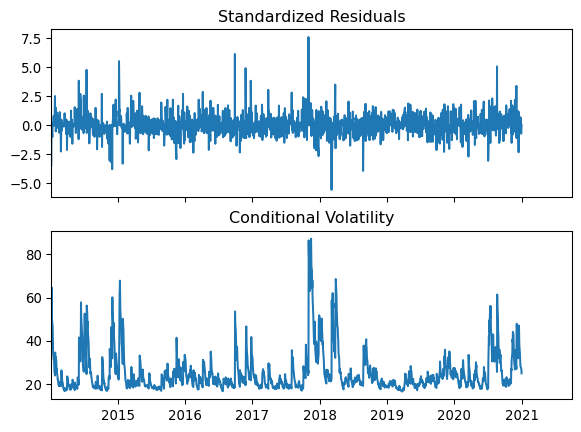

In [14]:
#| label: fig-garch-residuals
#| fig-cap: Residuos del modelo AR-GARCH.
fig = res.plot()

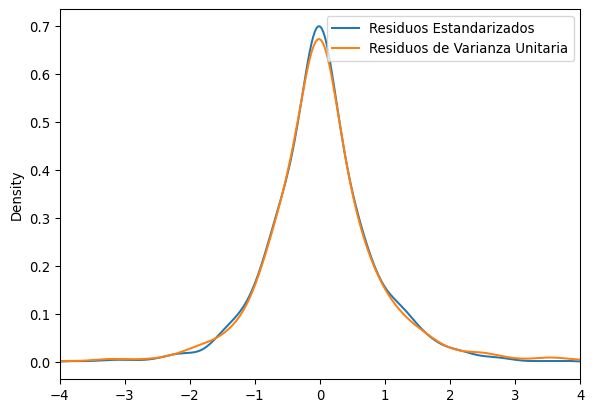

In [15]:
#| label: fig-residuals-vs-volatility
#| fig-cap: Residuos contra la volatilidad condicional del AR-GARCH.
std_resid = res.resid / res.conditional_volatility
unit_var_resid = res.resid / res.resid.std()
df = pd.concat([std_resid, unit_var_resid], axis=1)
df.columns = ["Residuos Estandarizados", "Residuos de Varianza Unitaria"]
subplot = df.plot(kind="kde", xlim=(-4, 4))

In [16]:
#| label: forecast
forecasts = res.forecast(horizon=1)
forecasted_std = np.sqrt(forecasts.variance)
forecasted_std = forecasted_std[forecasted_std.index >
                                split_date].loc[R_test.index, 'h.1']

In [17]:
#| label: mape
def MAPE(actual, predicted):
    actual_std = actual.rolling(window=5).std().dropna()
    return np.mean(np.abs((actual_std - predicted) / actual_std)) * 100

mape_value = MAPE(R_test, forecasted_std)
print(f"MAPE on Test Set (based on moving std): {mape_value:.2f}%")

MAPE on Test Set (based on moving std): 739.70%


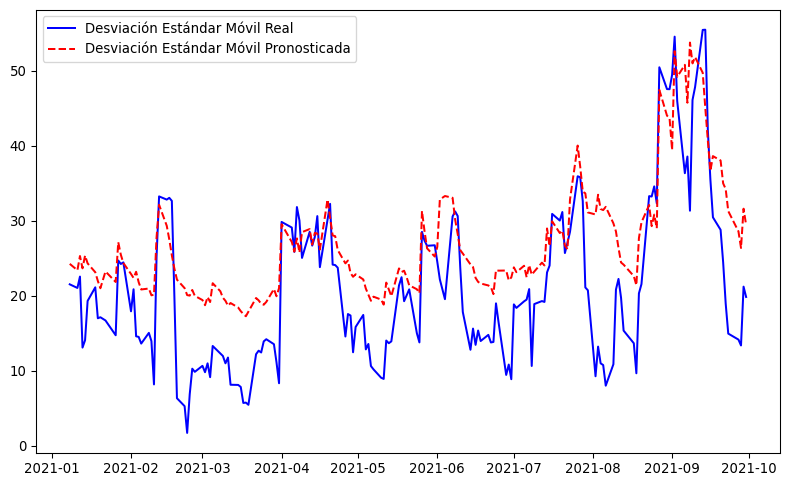

In [18]:
#| label: fig-predicted-vs-actual-backtest
#| fig-cap: Desviación Estándar Móvil Real vs Pronosticada - Modelo Zero-GARCH
plt.figure(figsize=(10, 6))
plt.plot(R_test.index, R_test,
         label='Desviación Estándar Móvil Real', color='blue')
plt.plot(forecasted_std.index,
         forecasted_std, label='Desviación Estándar Móvil Pronosticada', color='red', linestyle='--')
ax.set_xlim([forecasted_std.index.min(), forecasted_std.index.max()])
plt.legend()
plt.show()